In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm

In [3]:
# Loding the dataset
data = pd.read_csv('50_Startups.csv')

# EDA

In [6]:
# Chekcing number of rows and columns
data.shape

(50, 5)

In [8]:
# Data Set has 50 rows and 5 columns

In [10]:
# Checking top 5 rows
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [12]:
# Checking bottom 5 rows
data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [14]:
# Checking the column names, non null values of each column, and datatype of each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [16]:
# There are no null values and all data types are accurate

In [18]:
# Checking for missing values
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [20]:
# There are no null values

In [22]:
# Checking duplicate rows
data.duplicated().sum()

0

In [24]:
# There are no duplicate values

In [26]:
# Summary statistics of the dataset
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


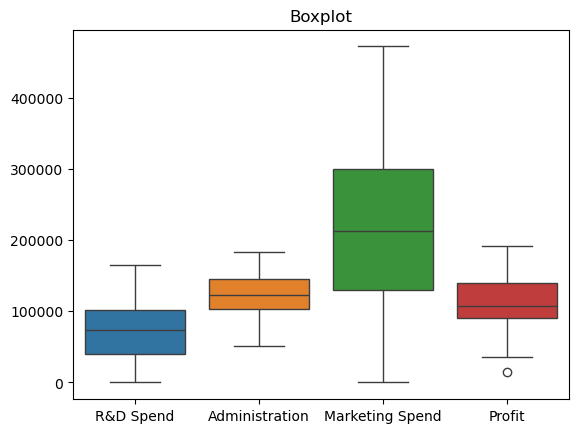

In [28]:
# Checking outliers using boxplot
sns.boxplot(data = data)
plt.title("Boxplot")
plt.show()

In [30]:
# Outlier present in profit towards min side

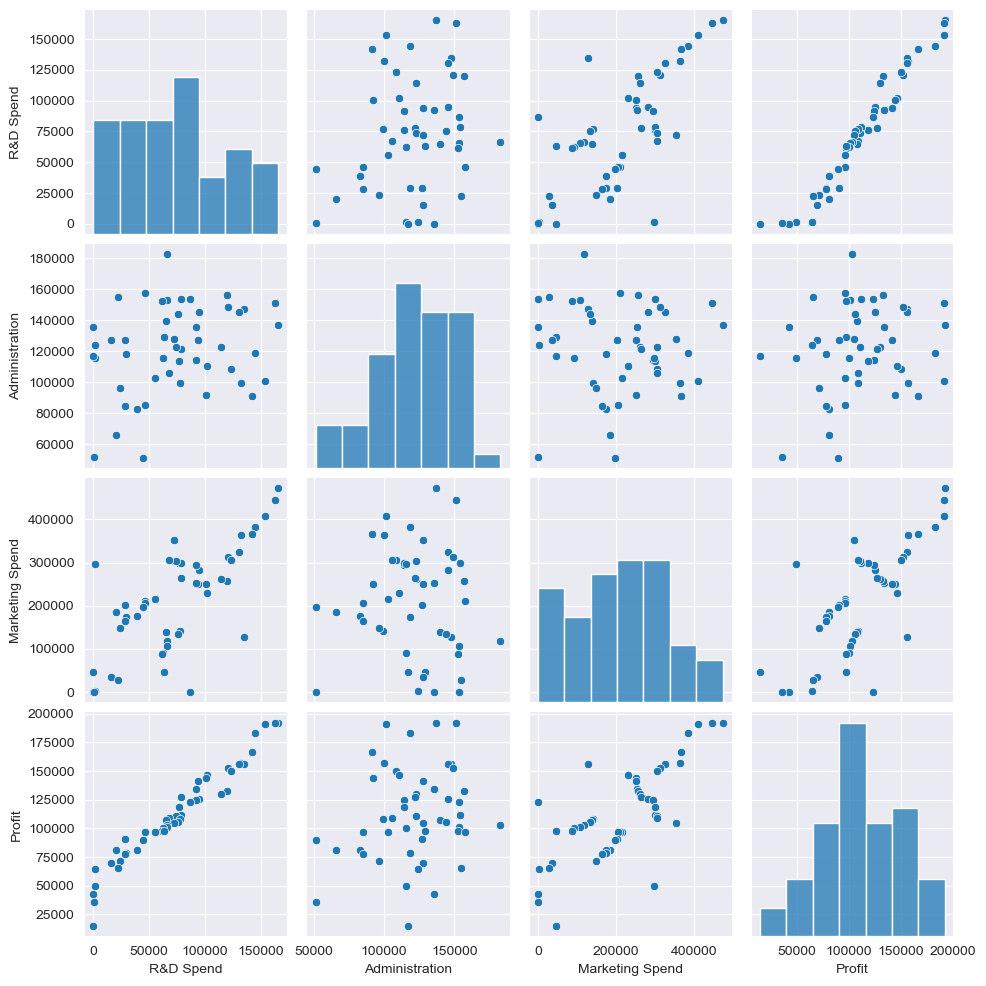

In [32]:
# Visualizing the relationships between variables
sns.set_style(style='darkgrid')
sns.pairplot(data)
plt.show()

In [33]:
data.corr(numeric_only=True)

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [34]:
# Weak Negative correlation between Marketing Spend and Administration, Weak positive correlation between R&D Spend and
# Administration. Strong positive correlation between Marketing spend and R&D Spend

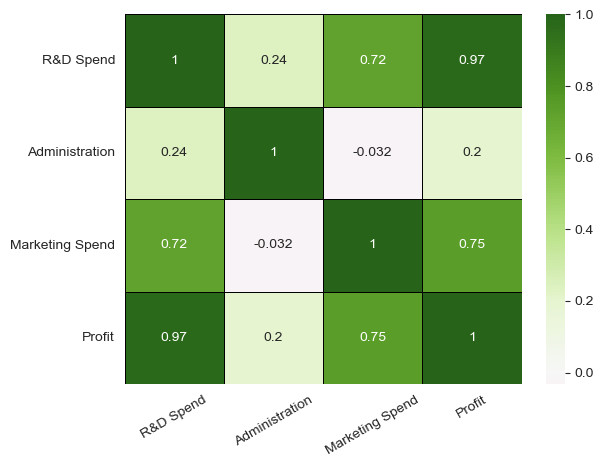

In [38]:
# Checking correlation between varialbe by using heatmap
sns.heatmap(data.corr(numeric_only=True), cmap='PiYG', center=0, annot=True, linewidths=0.5, linecolor='black')
plt.xticks(rotation=30)
plt.show()

In [40]:
# Checking the number of uniqure values in each column
data.nunique()

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64

In [42]:
# State column has onlhy 3 unique values which different from other variables

In [44]:
# Checking the 3 values of state column
data["State"].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

In [46]:
# Converting categorical variables to numerical by using one-hot encoding
data = pd.get_dummies(data, columns=["State"], drop_first=True, dtype=int)

In [48]:
# Checking the values after one-hot encoding
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [50]:
# Renaming the varialbes names into snake case
data.rename(columns={"R&D Spend" : "rnd_spend", "Administration" : "administration", "Marketing Spend" : "marketing_spend",
           "State" : "state", "Profit" : "profit", "State_Florida" : "state_florida", "State_New York" : "state_new_york"},
           inplace=True)

In [52]:
# Checking the column names after renaming
data.columns

Index(['rnd_spend', 'administration', 'marketing_spend', 'profit',
       'state_florida', 'state_new_york'],
      dtype='object')

# Model Building

## Model1

In [56]:
# Separting X and y variables from data
X = data.drop('profit', axis=1)
y = data['profit']

In [58]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Create LinearRegression object
model1 = LinearRegression()

In [62]:
# Train the model
model1.fit(X_train, y_train)

LinearRegression()

In [64]:
# Coefficients
model1.coef_

array([ 8.05630064e-01, -6.87878823e-02,  2.98554429e-02,  9.38793006e+02,
        6.98775997e+00])

In [66]:
# Predict on test data
y_pred1 = model1.predict(X_test)

## Model2

In [69]:
# Add constatnt to feature matrix
X_train_sm = sm.add_constant(X_train)

In [71]:
# Train the model
model2 = sm.OLS(y_train, X_train_sm).fit()

In [73]:
# Check the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     140.1
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           1.13e-21
Time:                        12:37:02   Log-Likelihood:                -420.63
No. Observations:                  40   AIC:                             853.3
Df Residuals:                      34   BIC:                             863.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.403e+04   8457.293      6.388      0.000    3.68e+04    7.12e+04
rnd_spend           0.8056      0.052     15.383      0.000       0.699       0.912
administration     -0.0688      0.061     -1.133      0.265      -0.192       0.055
marketing_spend     0.0299      0.022      1.346      0.187      -0.015       0.075
state_florida     938.7930   3893.511      0.241      0.811   -6973.773    8851.359
state_new_york      6.9878   3882.765      0.002      0.999   -7883.740    7897.715
==============================================================================
Omnibus:                       15.391   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.231
Skew:                          -1.142   Prob(JB):                     4.05e-05
Kurtosis:                       5.631   Cond. No.                     1.64e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
# Rsquared value is 95.4 and only rnd_spend variable has p-value < 0.05

In [77]:
# Ensuring the length of p-values matches the number of features including the constant
p_values = model2.pvalues[1:]  # Exclude the constant term's p-value
selected_features = X_train.columns[p_values < 0.05]

In [79]:
# Creating new train data where featrues have p-value 0.05
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [81]:
# Creating instance of LinearRegression
model2 = LinearRegression()

In [83]:
# Training the model
model2.fit(X_train_selected, y_train)

LinearRegression()

In [85]:
model2.coef_

array([0.85360911])

In [87]:
# Predicting on the test data
y_pred2 = model2.predict(X_test_selected)

## Model3

In [90]:
# Feature interaction
data['rnd_administration'] = data['rnd_spend'] * data['administration']

In [92]:
# Creating fetures
X = data.drop('profit', axis=1)

In [94]:
# Creating target variable
y = data['profit']

In [96]:
# Spliting training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
# Create object of LinearRegression
model3 = LinearRegression()

In [100]:
# Training model3 with training data
model3.fit(X_train, y_train)

LinearRegression()

In [102]:
# Predicting with test data
y_pred3 = model3.predict(X_test)

# Model Evaluation

In [105]:
# Creating function to calculate mse, mae, rmse, and r2
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, rmse, r2

In [107]:
# Calling functions and saving the result
mse1, mae1, rmse1, r21 = evaluate_model(y_test, y_pred1)
mse2, mae2, rmse2, r22 = evaluate_model(y_test, y_pred2)
mse3, mae3, rmse3, r23 = evaluate_model(y_test, y_pred3)

In [109]:
# Print the model performence metrics
print(f"Model 1 - MSE: {mse1}, MAE: {mae1}, RMSE: {rmse1}, R^2: {r21}")
print(f"Model 2 - MSE: {mse2}, MAE: {mae2}, RMSE: {rmse2}, R^2: {r22}")
print(f"Model 3 - MSE: {mse3}, MAE: {mae3}, RMSE: {rmse3}, R^2: {r23}")

Model 1 - MSE: 82010363.04430102, MAE: 6961.477813252382, RMSE: 9055.957323458466, R^2: 0.8987266414328637
Model 2 - MSE: 59510962.80787996, MAE: 6077.363300620399, RMSE: 7714.334890830185, R^2: 0.9265108109341951
Model 3 - MSE: 77479406.9785938, MAE: 6785.699333452403, RMSE: 8802.238748102314, R^2: 0.9043218506388812


In [111]:
# Model2 is best as we see MSE, MAE and RMSE are low compare to all and Rsquare is highest among three.